# Red and white wine data analysis

### Import data and relevant libraries

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# change how columns are displayed in DataFrames
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 100

# set data location and import data
red_wine_data_loc = 'data/winequality-red.csv'
white_wine_data_loc = 'data/winequality-white.csv'

red_wine_data = pd.read_csv(red_wine_data_loc, sep=';', engine='python')
white_wine_data = pd.read_csv(white_wine_data_loc, sep=';', engine='python')

### Explore data

In [2]:
# print how many rows in both DataFrames
print("Number of red wine records: %i" % len(red_wine_data))
print("Number of white wine records: %i" % len(white_wine_data))

Number of red wine records: 1599
Number of white wine records: 4898


In [3]:
# combine into one DataFrame and shuffle
all_wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)
all_wine_data = all_wine_data.sample(frac=1, random_state=5).reset_index(drop=True)

print("Number of all wine records: %i" % len(all_wine_data))

Number of all wine records: 6497


In [4]:
# print first 3 rows of white wine DataFrame
all_wine_data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.1,0.44,0.37,2.7,0.041,35.0,128.0,0.98960,3.07,0.43,13.5,7
1,9.2,0.36,0.34,1.6,0.062,5.0,12.0,0.99667,3.20,0.67,10.5,6
2,6.8,0.23,0.29,15.4,0.073,56.0,173.0,0.99840,3.06,0.41,8.7,6


In [5]:
# check types of data in each column
all_wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
# check if any columns have missing values
all_wine_data.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
# generate key statistics for each column in the white wine DataFrame
all_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
# print frequency table of quality scores
all_wine_quality_scores_df = pd.crosstab(index=all_wine_data["quality"], columns="count") 

all_wine_quality_scores_df

col_0,count
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


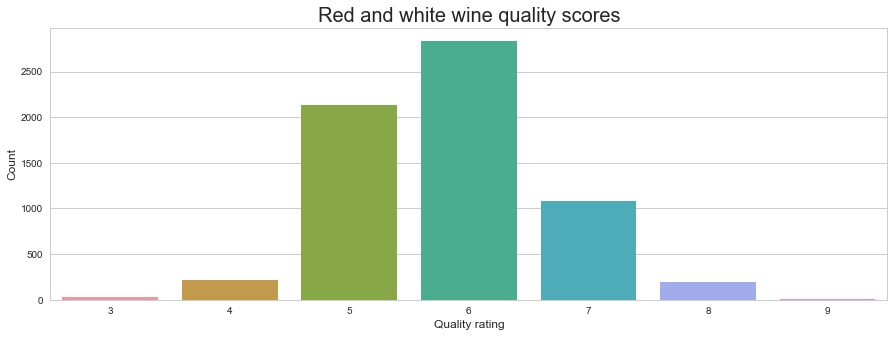

In [9]:
# plot bar chart showing range of quality scores
sns.set(style="whitegrid")
fig = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x='quality', data=all_wine_data)
plt.title('Red and white wine quality scores', fontsize=20)
plt.xlabel('Quality rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('visualisations/all-wine-quality-scores.png')
plt.show()

In [10]:
# generate correlation matrix for data
all_wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


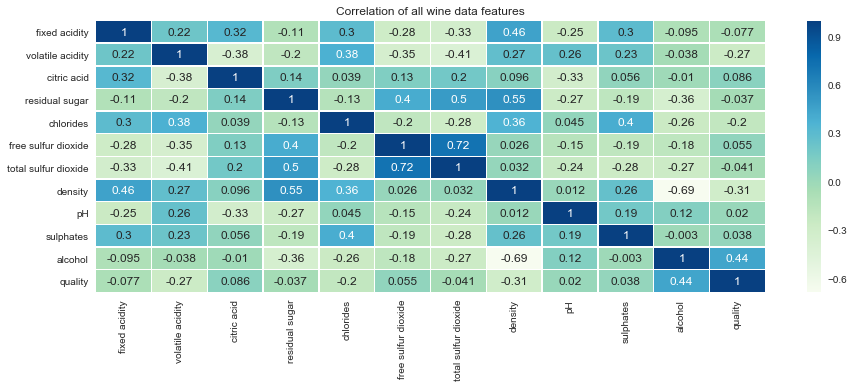

In [11]:
# plot correlation heat map
fig = plt.subplots(figsize=(15, 5))
ax = sns.heatmap(all_wine_data.corr(), linewidths=.5, cmap="GnBu", annot=True)
plt.title('Correlation of all wine data features')
plt.savefig('visualisations/all-wine-correlation-heatmap.png')
plt.show()

### Clean data

In [12]:
# split quality ratings into categorical bins - label in parenthesis:
# 1 - 4 = poor (0)
# 5 - 6 = average (1)
# 7 - 10 = good (2)

bins = [1,4,6,10]

quality_labels=[0,1,2]

all_wine_data['quality_category'] = pd.cut(all_wine_data['quality'], bins=bins, labels=quality_labels, include_lowest=True)

all_wine_data['quality_category'].value_counts()

1    4974
2    1277
0     246
Name: quality_category, dtype: int64

### Build prediction models

In [13]:
# import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [14]:
# set features and labels (wine_quality)
features = all_wine_data.drop(['quality', 'quality_category'], axis=1)
wine_quality = all_wine_data['quality_category']

# split data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(features, wine_quality, test_size=0.2, random_state=25)

# scale features due to wide variance in values - see key statistics table above
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(train_data)
train_data_minmax = minmax_scaler.transform(train_data)
test_data_minmax = minmax_scaler.transform(test_data)

In [15]:
# create list to store data about the performance of each model
results = []

# create list of models
models = [
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()
]

# iterate through list of models and run cross validation 10 times and store accuracy values
for model in models:
    result = {}
    classifier_name = model.__class__.__name__
    kfold = KFold(n_splits=10, random_state=25)
    cross_val_results = cross_val_score(model, train_data_minmax, train_labels, cv=kfold, scoring='accuracy')
    result['classifier_name'] = classifier_name
    result['classifier_results'] = cross_val_results
    results_message = "Accuracy of %s: %0.2f (+/- %0.2f)" % (classifier_name, cross_val_results.mean(), cross_val_results.std())
    print(results_message)
    results.append(cross_val_results)

Accuracy of SVC: 0.77 (+/- 0.02)
Accuracy of DecisionTreeClassifier: 0.78 (+/- 0.02)
Accuracy of KNeighborsClassifier: 0.80 (+/- 0.02)
Accuracy of RandomForestClassifier: 0.83 (+/- 0.02)
Accuracy of GradientBoostingClassifier: 0.81 (+/- 0.02)
Accuracy of GaussianNB: 0.70 (+/- 0.02)


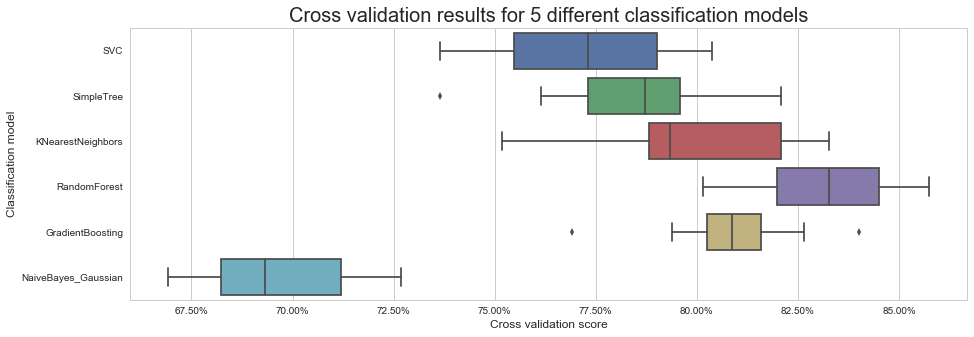

In [16]:
# create box plot showing cross validation results
names = ['SVC', 'SimpleTree', 'KNearestNeighbors', 'RandomForest', 'GradientBoosting', 'NaiveBayes_Gaussian']
fig = plt.subplots(figsize=(15, 5))
ax = sns.boxplot(data=results, orient='h')
ax.set_yticklabels(labels=names)
x_values = ax.get_xticks()
ax.set_xticklabels(['{:,.2%}'.format(val) for val in x_values])
plt.title('Cross validation results for 5 different classification models', fontsize=20)
plt.xlabel('Cross validation score', fontsize=12)
plt.ylabel('Classification model', fontsize=12)
plt.savefig('visualisations/all-wine-model-cross-validation-boxplot.png')
plt.show()

### Select model

Based on the analysis done above, I have selected the **Random Forest classification model** as it had the highest overall accuracy based on a cross-validation of all models using the training data and labels.

### Create Random Forest Classifier, tune model, and determine which features are key to generate predictions

In [17]:
# create list of all feature labels
feature_labels = list(all_wine_data.columns.values)

In [18]:
# create Random Forest Classifier and fit model with training data and labels
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=25)
rf_classifier.fit(train_data_minmax, train_labels)

# generate predictions using test data
rf_classifier_predictions = rf_classifier.predict(test_data_minmax)
rf_classifier_accuracy_score = accuracy_score(test_labels, rf_classifier_predictions)

# print accuracy score
print('The accuracy score of the original Random Forest Classifier: %f' % (rf_classifier_accuracy_score))

The accuracy score of the original Random Forest Classifier: 0.843846


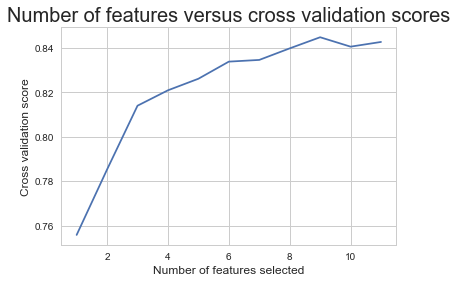

In [19]:
# create Random Forest Classifier
rfe_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=25)

# create RFE model using the Random Forest Classifer and fit model with training data and labels
rfecv_model = RFECV(rfe_rf_classifier, step=1, cv=KFold(n_splits=5), scoring='accuracy')
rfecv_model.fit(train_data_minmax, train_labels)

# Plot number of features versus cross-validation scores
plt.figure()
plt.title('Number of features versus cross validation scores', fontsize=20)
plt.xlabel('Number of features selected', fontsize=12)
plt.ylabel('Cross validation score', fontsize=12)
plt.plot(range(1, len(rfecv_model.grid_scores_) + 1), rfecv_model.grid_scores_)
plt.savefig('visualisations/random-forest-rfe-cross-validation-vs-features.png')
plt.show()

In [20]:
# print number of optimal features
print("The optimal number of features for the RFE version of the Random Forest Classifier: %d" % rfecv_model.n_features_)

The optimal number of features for the RFE version of the Random Forest Classifier: 9


In [21]:
# generate list of important features using list comprehension
important_features = [feature_labels[num] for num, val in enumerate(rfecv_model.support_) if val == True]

# print list of important features
print(important_features)

['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [22]:
# create subset of training and test data using important features
train_data_important_features = rfecv_model.transform(train_data_minmax)
test_data_important_features = rfecv_model.transform(test_data_minmax)

In [23]:
# create new Random Forest Classifier and fit using subset of training data (based on important features)
rf_classifier_important_features = RandomForestClassifier(n_estimators=100, random_state=25)
rf_classifier_important_features.fit(train_data_important_features, train_labels)

# generate predictions using subset of test data (based on important features)
rf_classifier_important_features_predictions = rf_classifier_important_features.predict(test_data_important_features)
rf_classifier_important_features_accuracy_score = accuracy_score(test_labels, rf_classifier_important_features_predictions)

# print accuracy score
print('The accuracy score of the Random Forest Classifier tuned with most important features: %f' % (rf_classifier_important_features_accuracy_score))

The accuracy score of the Random Forest Classifier tuned with most important features: 0.844615
